# Instacart Grocery Shopping Analysis

## Project Objective
The objective of this project is to clean and analyze Instacart grocery shopping data to uncover insights into customer purchasing behavior. This includes identifying trends such as which products are most frequently purchased, how order frequency varies across days and hours, and which aisles are most popular. By the end of this project, we aim to produce visualizations and statistical summaries that help stakeholders better understand customer habits and improve strategic decision-making.

##  Dataset Overview
The dataset used in this project is a modified version of Instacart’s public dataset originally released for a Kaggle competition in 2017. It contains information about:
- Orders placed by users
- Products in each order
- Product metadata (like product names, aisles, and departments)
- Timing of orders (days of the week and hours of the day)

**Modifications to the dataset include:**
- A reduced dataset size for faster computation
- The introduction of missing values and duplicates
- Preservation of original distributions to maintain analytical validity

The main CSV files provided include:
- `orders.csv`: Order-level details including user ID, order number, and order timing
- `order_products.csv`: Information about which products are in each order
- `products.csv`, `aisles.csv`, `departments.csv`: Metadata about each product

##  Expected Outcomes
By the end of the project, we aim to:
- Clean the data (handle duplicates and missing values)
- Perform exploratory data analysis (EDA)
- Visualize key patterns such as:
  - The most commonly purchased products
  - Shopping patterns by day of week and hour of day
  - Customer reordering behavior
- Summarize insights that could inform business decisions or marketing strategies

All findings will be supported by well-labeled plots and concise explanations to ensure clarity and impact.


# Instacart Market Basket Analysis

## Importing the required libraries

In [ ]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In [3]:
# In this cell, type "orders" below this line and execute the cell
orders.head()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# In this cell, type "products" below this line and execute the cell
products.head()
products.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [5]:
# In this cell, type "orders.info() below this line and execute the cell

aisles.head()
aisles.info()
departments.head()
departments.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [6]:
# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.head()
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [7]:
# Display rows where the product_name column has missing values
print(products.isnull().sum())


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [8]:
# Combine conditions to check for missing product names in aisles other than 100
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 100)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [9]:
# Combine conditions to check for missing product names in aisles other than 21
print(products[(products['product_name'].isna()) & (products['department_id'] != 21)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [10]:
# What is this aisle and department?
print(aisles[aisles['aisle_id'] == 100])
print(departments[departments['department_id'] == 21])


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [11]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [12]:
# Display rows where the days_since_prior_order column has missing values
orders[orders['days_since_prior_order'].isna()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [13]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [14]:
# Display rows where the add_to_cart_order column has missing values
order_products[order_products['add_to_cart_order'].isna()]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [15]:
# Use .min() and .max() to find the minimum and maximum values for this column.
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()


(1.0, 64.0)

In [16]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()


In [17]:
# Do all orders with missing values have more than 64 products?
missing_orders = order_products[order_products['order_id'].isin(missing_values_orders)]
order_count_per_order = missing_orders.groupby('order_id').size()
order_count_per_order[order_count_per_order > 64]


order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

In [18]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Overall, your exploration and cleaning process is well-thought-out. 

You correctly identified and addressed NaN values in `product_name`, `days_since_prior_order`, `add_to_cart_order`. 

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [19]:
# Find the number of duplicate rows in the orders dataframe
print(orders.duplicated().sum())


15


In [20]:
# View the duplicate rows
print(orders[orders.duplicated()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [21]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)


In [22]:
# Double check for duplicate rows
print(orders.duplicated().sum())


0


### `products` data frame

In [23]:
# Check for fully duplicate rows
print(products.duplicated().sum())


0


In [24]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
print(products[products.duplicated(subset='product_id')])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [25]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(products[products['product_name'].str.lower() == 'high performance energy drink'])


       product_id                   product_name  aisle_id  department_id
22540       22541  High Performance Energy Drink        64              7
49689       49690  HIGH PERFORMANCE ENERGY DRINK        64              7


Let's see what that looks like in our dataset :

In [26]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [27]:
# Drop duplicate product names (case insensitive)
products['product_name'] = products['product_name'].str.lower()
products = products.drop_duplicates(subset='product_name').reset_index(drop=True)


### `departments` data frame

In [28]:
# Check for duplicate entries in the departments dataframe
departments[departments.duplicated()]

,department_id,department


### `aisles` data frame

In [29]:
# Check for aisles entries in the departments dataframe
aisles[aisles.duplicated()]


,aisle_id,aisle


### `order_products` data frame

In [30]:
# Check for duplicate entries in the order_products dataframe
order_products[order_products.duplicated()]


,order_id,product_id,add_to_cart_order,reordered


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

You've done a good job at checking duplicates in the table.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

If you're repeating the same set of operations (like checking info, printing the head, checking for NaNs, and checking for duplicates) for each dataframe, consider creating a function to perform these checks. This will make your code cleaner and more efficient.

````
def analyze_data(df):
    # Info
    print(df.info())
    
    # First few rows
    print(df.head())
    
    # Missing values
    print(df.isna().sum())
    
    # Duplicates
    print(df.duplicated().sum())

# Use the function
analyze_data(aisles)
analyze_data(departments)
# ... and so on for other dataframes
````

    


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [31]:
print(sorted(orders['order_hour_of_day'].unique()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [32]:
print(sorted(orders['order_dow'].unique()))




[0, 1, 2, 3, 4, 5, 6]


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

As a second approach you could use `.describe()` function for getting an initial understanding of data, especially for numeric columns. However, this function might return descriptive statistics for all numeric columns in the dataframe. If you are interested in specific columns, you might want to narrow it down.

`instacart[['order_hour_of_day', 'order_dow']].describe()`
    


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


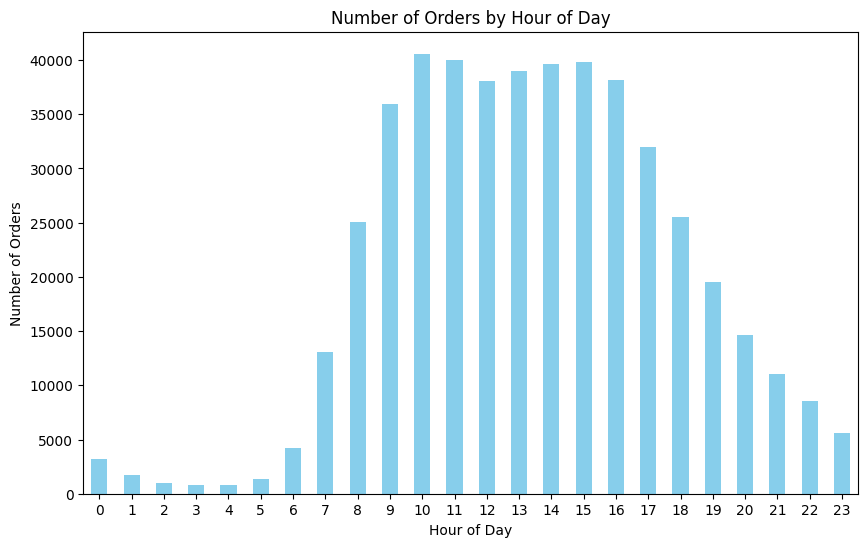

In [33]:
order_hour_counts = orders['order_hour_of_day'].value_counts().sort_index()
print(order_hour_counts)

order_hour_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Everything is correct here. 

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


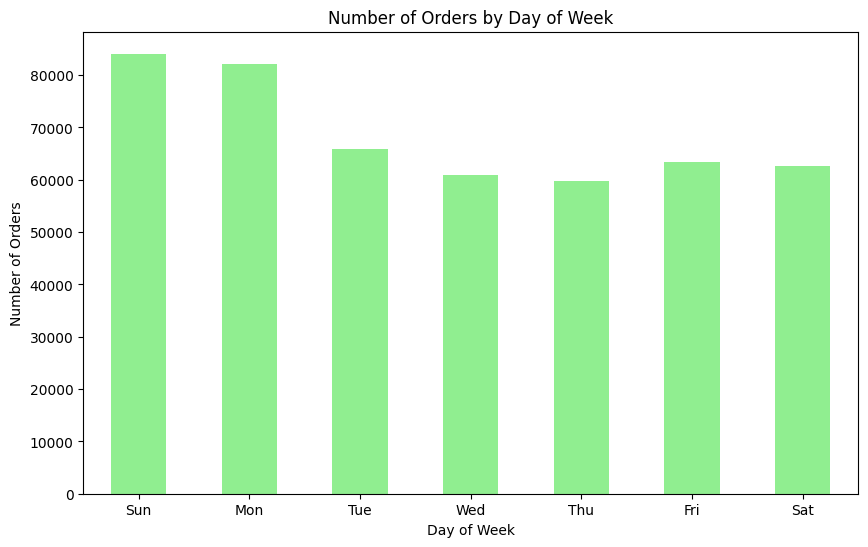

In [34]:
order_dow_counts = orders['order_dow'].value_counts().sort_index()
print(order_dow_counts)

order_dow_counts.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.show()


The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

You got correct results. 

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64


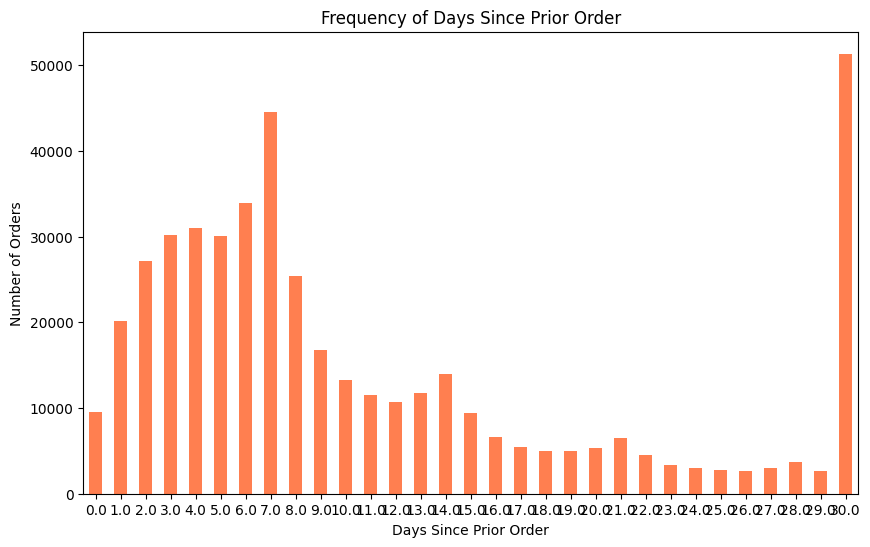

In [35]:
days_since_prior_order_counts = orders['days_since_prior_order'].value_counts().sort_index()
print(days_since_prior_order_counts)

days_since_prior_order_counts.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Frequency of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

You could also add descriptive analysis in the following way: 
   
```python
avg_days = days_since_prior_order_counts.mean()
median_days = days_since_prior_order_counts.median()
print(f"The order frequency shows a notable spike at 7 days ({days_since_prior_order_counts[7]} orders).")
print(f"Average days between orders: {avg_days:.2f}")
print(f"Median days between orders: {median_days:.2f}")
```

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Well done! 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

To determine if there’s a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot histograms for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times.

In [36]:
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day']
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day']

In [37]:
wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()


In [38]:
comparison_df = pd.concat([wednesday_counts, saturday_counts], axis=1, keys=['Wednesday', 'Saturday'])
comparison_df = comparison_df.fillna(0)

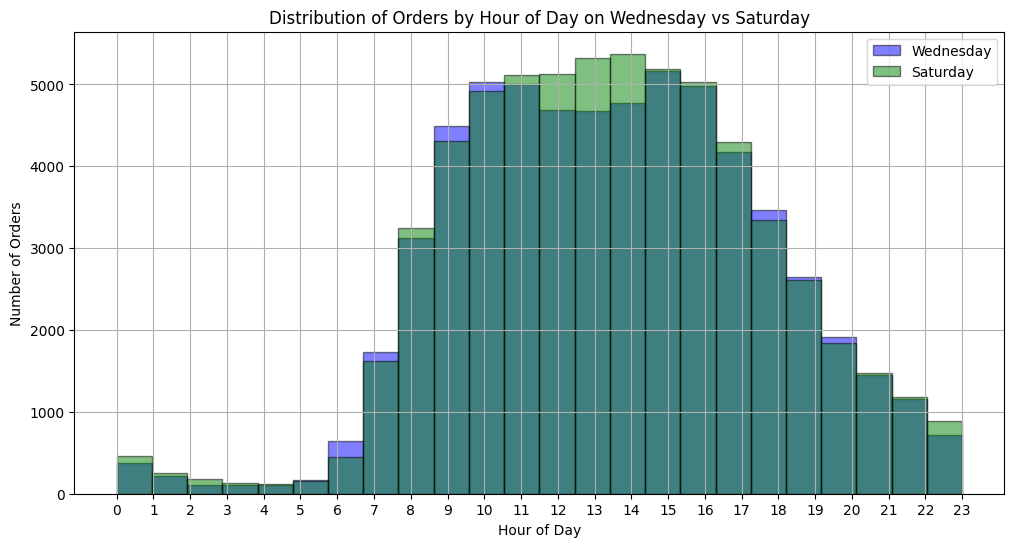

,Wednesday,Saturday
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


In [39]:
plt.figure(figsize=(12, 6))
plt.hist(wednesday_orders, bins=24, alpha=0.5, label='Wednesday', color='blue', edgecolor='black', range=(0, 23))
plt.hist(saturday_orders, bins=24, alpha=0.5, label='Saturday', color='green', edgecolor='black', range=(0, 23))
plt.legend(loc='upper right')
plt.title('Distribution of Orders by Hour of Day on Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Display the combined counts for both days
comparison_df

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here. 

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [40]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()
orders_per_customer_sorted = orders_per_customer.sort_values(ascending=False)


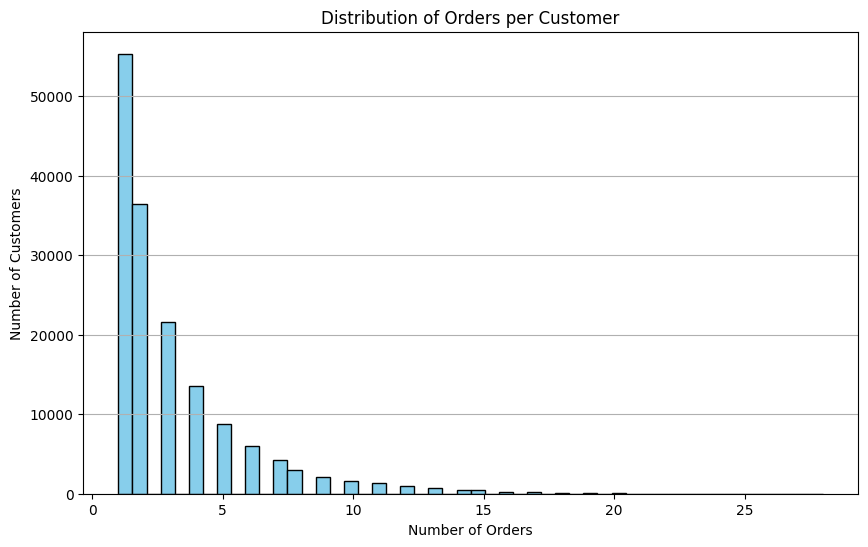

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Additionally you could add a mean line to your histogram in the following way: 
    
```
mean_value = order_counts.mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
```

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here. 

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [42]:
merged = pd.merge(order_products, products, on='product_id')
popular_products = merged.groupby(['product_id', 'product_name']).size().reset_index(name='order_count')

In [43]:
popular_products_sorted = popular_products.sort_values(by='order_count', ascending=False)
top_20 = popular_products_sorted.head(20)
print(top_20)

       product_id              product_name  order_count
22310       24852                    banana        66050
11767       13176    bag of organic bananas        53297
18953       21137      organic strawberries        37039
19643       21903      organic baby spinach        33971
42277       47209      organic hass avocado        29773
42778       47766           organic avocado        24689
42654       47626               large lemon        21495
15029       16797              strawberries        20018
23522       26209                     limes        19690
24995       27845        organic whole milk        19600
25102       27966       organic raspberries        19197
20572       22935      organic yellow onion        15898
22409       24964            organic garlic        15292
40301       45007          organic zucchini        14584
35196       39275       organic blueberries        13879
44510       49683            cucumber kirby        13675
25318       28204        organi

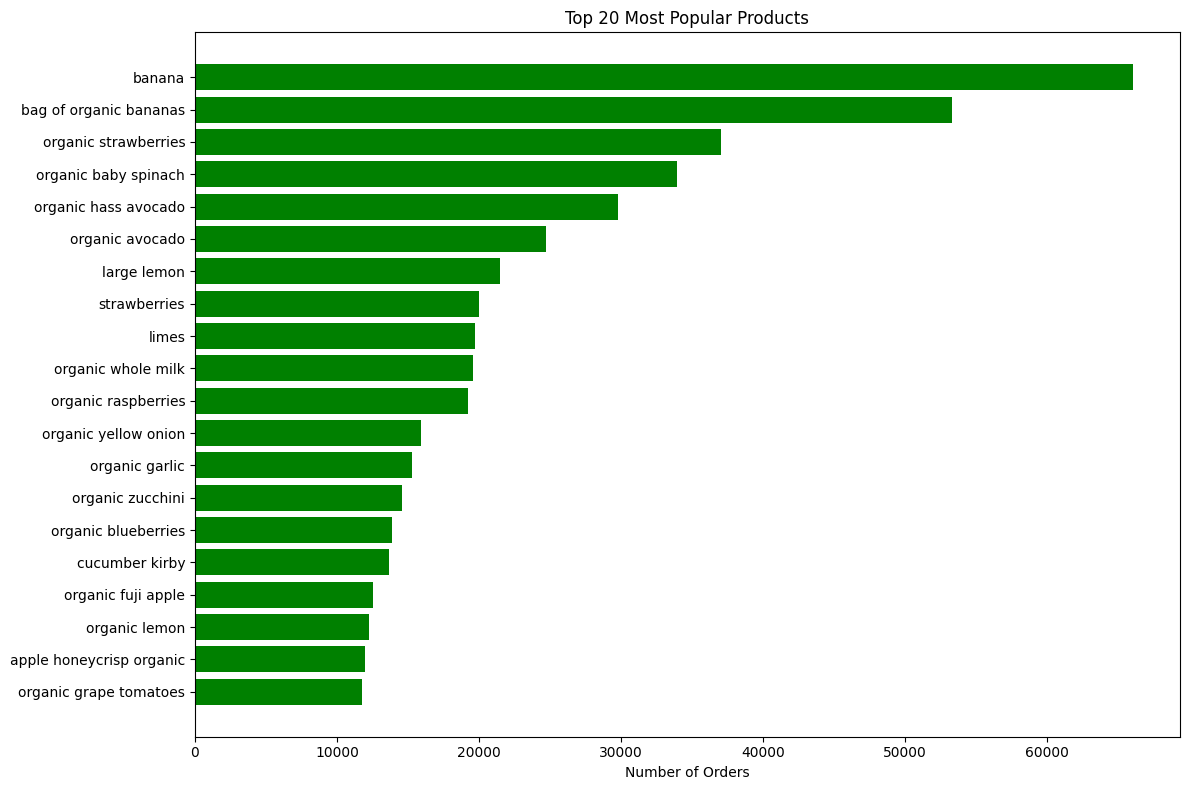

In [44]:
plt.figure(figsize=(12, 8))
plt.barh(top_20['product_name'][::-1], top_20['order_count'][::-1], color='green')
plt.xlabel('Number of Orders')
plt.title('Top 20 Most Popular Products')
plt.tight_layout()
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Well done! 

Great that you've created a graph visualizing this data.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [45]:
order_sizes = order_products.groupby('order_id')['product_id'].count()


In [46]:
order_size_counts = order_sizes.value_counts().sort_index()


Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

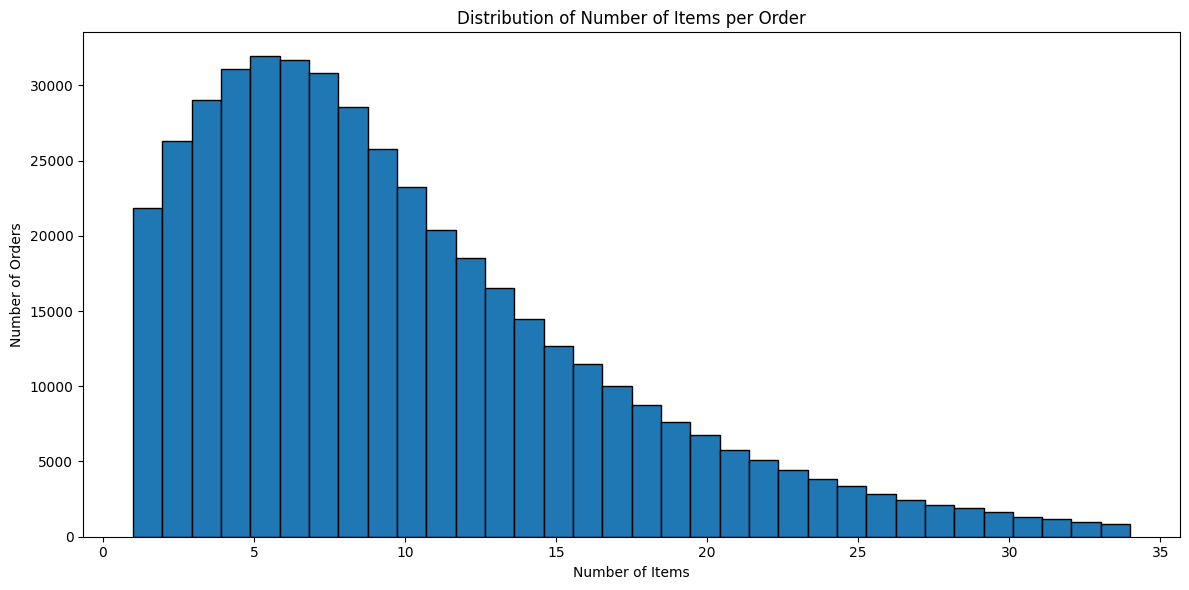

In [47]:
plt.figure(figsize=(12,6))
order_sizes[order_sizes < 35].hist(bins=34, edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.tight_layout()
plt.show()


The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
You got correct results. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [48]:
reordered_products = order_products[order_products['reordered'] == 1]


In [49]:
reordered_merged = pd.merge(reordered_products, products, on='product_id')


In [50]:
reorder_counts = reordered_merged.groupby(['product_id', 'product_name']).size()
top_reordered = reorder_counts.sort_values(ascending=False).head(20)


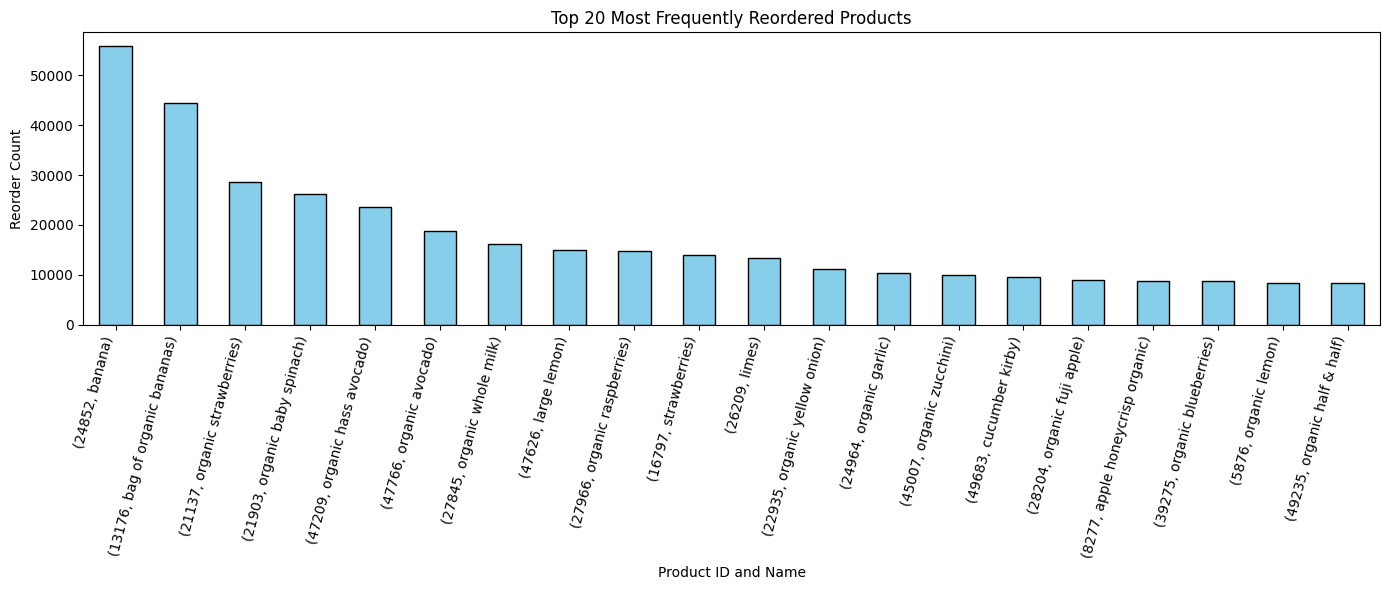

In [51]:
top_reordered.plot(kind='bar', figsize=(14,6), color='skyblue', edgecolor='black')
plt.title('Top 20 Most Frequently Reordered Products')
plt.xlabel('Product ID and Name')
plt.ylabel('Reorder Count')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here.  

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [52]:
merged_df = pd.merge(order_products, products, on='product_id')
product_reorder_rate = merged_df.groupby(['product_id', 'product_name'])['reordered'].mean()


In [53]:
sorted_reorder_rate = product_reorder_rate.sort_values(ascending=False)


In [54]:
sorted_reorder_rate_df = sorted_reorder_rate.reset_index()


In [67]:
sorted_reorder_rate_df.head()

,product_id,product_name,reordered
0,18121,jalapenos with sea salt,1.0
1,27387,banana greek nonfat yogurt,1.0
2,17773,quinoa- with olive oil,1.0
3,49063,rosemary & sea salt crackers,1.0
4,14935,kombucha blueberry basil,1.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Correct results 👏

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [55]:
merged_data = pd.merge(order_products, orders, on='order_id')
user_reorder_proportion = merged_data.groupby('user_id')['reordered'].mean()



In [56]:
user_reorder_proportion_sorted = user_reorder_proportion.sort_values(ascending=False)
user_reorder_df = user_reorder_proportion_sorted.reset_index()
user_reorder_df.head()


,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Well done! 

### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [57]:
merged_cart = pd.merge(order_products, products, on='product_id')
first_in_cart = merged_cart[merged_cart['add_to_cart_order'] == 1]


In [58]:
first_item_counts = first_in_cart.groupby(['product_id', 'product_name']).size()
first_item_sorted = first_item_counts.sort_values(ascending=False)


In [59]:
top_20_first_cart_items = first_item_sorted.head(20).reset_index(name='first_add_count')


The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

In [60]:
top_20_first_cart_items


,product_id,product_name,first_add_count
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great work! Additionally you could also create a graph here. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Also everything is correct here. Kudos for completing all tasks in this project 😇